# Modèle ARIMA sur un autre voxel de la matière grise sur un autre bp file

In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
#bpfile = '/scratch/user/hirsch/datadir3/data_results_py/wcrat0009_epi_s04_d0001_merged_bp.nii.gz'
bpfile = '/scratch/user/hirsch/datadir4/data_results_py/functionnal/bandpassedFile/wcrat0009_epi_s04_d0001_merged_bp.nii.gz'

bp =nib.load(bpfile)
bparray = np.asarray(bp.dataobj).copy()

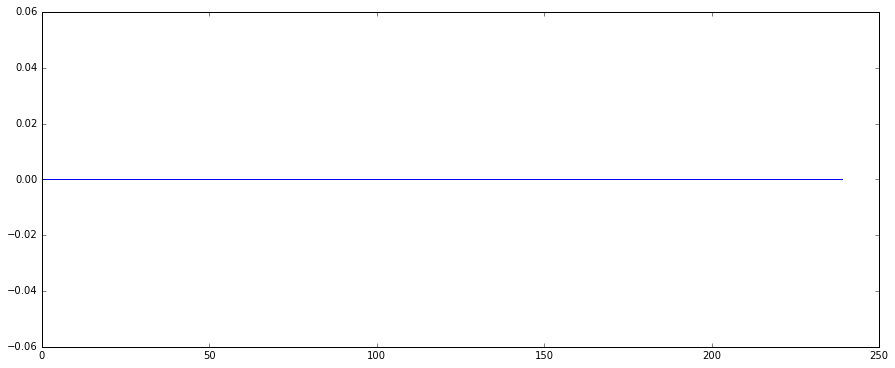

In [4]:
# 9292 array([19, 33, 12])
ts_bp =  bparray[19, 33, 12, :]
#ts_bp =  bparray[10, 42,  32, :]
plt.plot(ts_bp)

In [27]:
ts_bp

array([  3.52134657,  -6.23378086,   7.16301107,  -0.85338044,
         0.38919878,   9.70041084,  -0.10137814,  -0.97010434,
         4.39753199,   7.37915182,   3.02741289,   0.27556968,
         9.07578087,  -0.36453417,   0.45492637,   8.01819897,
        -7.45907688,   1.12639153,  -1.86202526, -14.18193626,
         9.10979843,  -2.3510561 , -15.02653503,   0.3556169 ,
        -6.79150009,   1.37233281,  -0.06516778, -10.33544922,
         7.74271011,  -3.84441495, -11.46653557,   0.19664401,
        -9.37285137,  -2.64104748,   0.67968708,  -8.07962322,
        -4.94610643,  -3.77980924,   1.60525918,  -7.6991148 ,
       -10.47699547,   8.51212692,  -1.465832  ,  -5.80942059,
         5.0622263 ,  -3.1159935 ,   2.34565997,  13.70955658,
         9.16820717,   1.24649346,  -1.70214951,  -2.99391389,
        -9.32885551,  -1.67303038,   4.66308069,  -8.80695152,
       -14.28727722,  -5.18984604,  11.27925968,   4.45911932,
       -11.84894371,   3.60017395,   3.12315154,   1.47

In [28]:
# covert numpy array to panda
l = len(ts_bp)
index = ['Row'+str(i) for i in range(1, l+1)]
df = pd.DataFrame(ts_bp, index=index)

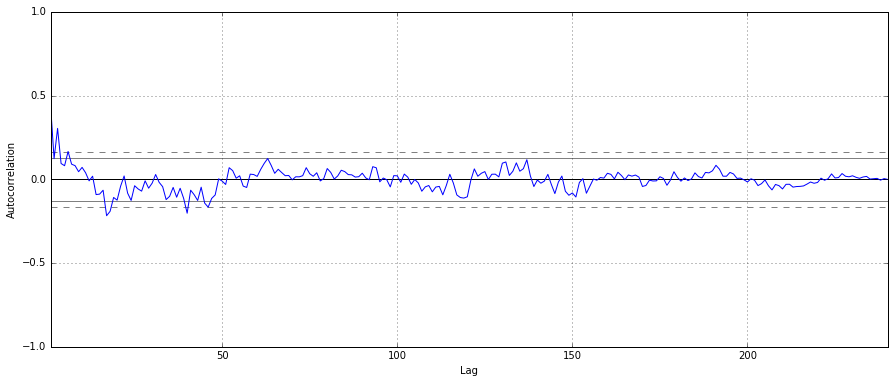

In [29]:
# plot the auto correllation 
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

autocorrelation_plot(df)
pyplot.show()

## Autocorrelations and partial autocorrelations

Partial autocorrelations. Another useful method to examine serial dependencies is to examine the partial autocorrelation function (PACF) – an extension of autocorrelation, where the dependence on the intermediate elements (those within the lag) is removed.

Once we determine the nature of the auto-correlations we use the following rules of thumb.

    Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
    Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
    Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
    Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
    Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.
    
from https://bicorner.com/2015/11/16/time-series-analysis-using-ipython/

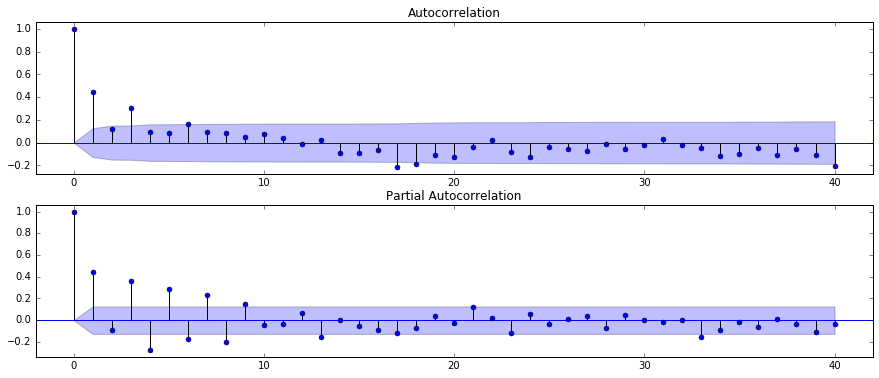

In [30]:
# et partial autocorrelation
# show plots in the notebook
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

## Durbin-Watson statistic

Another popular test for serial correlation is the Durbin-Watson statistic. The DW statistic will lie in the 0-4 range, with a value near two indicating no first-order serial correlation. Positive serial correlation is associated with DW values below 2 and negative serial correlation with DW values above 2.

In [31]:
sm.stats.durbin_watson(df)

array([ 1.07568884], dtype=float32)

In [32]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

ro.r('library(stats)')

rdf = pandas2ri.py2ri(df)
ro.globalenv['r_timeseries'] = rdf

In [33]:
rdf

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fc0e4535f38 / R:0x62c5758>
[FloatVector]
  X0: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fc0e3004d40 / R:0x687d730>
[3.521347, -6.233781, 7.163011, ..., 19.135759, 21.906477, 25.604164]

## Modélisation Arima

In [35]:
ro.r('fit <- arima(r_timeseries)')
print(ro.r('summary(fit)'))

['  1' '  1' '  1' '  1' '  1' '  1' '  7' '240' '  2' '  1' '  1' '  1'
 '  1' ' 10' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-'
 'ts' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-' 'numeric'
 'numeric' 'numeric' 'logical' 'numeric' 'numeric' 'numeric' 'numeric'
 'call' 'character' 'numeric' 'numeric' 'numeric' 'list']


In [36]:
ro.r('fit <- arima(r_timeseries, order = c(1,1,1))')
print(ro.r('summary(fit)'))


['  2' '  1' '  4' '  2' '  1' '  1' '  7' '240' '  3' '  1' '  1' '  1'
 '  1' ' 10' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-'
 'ts' '-none-' '-none-' '-none-' '-none-' '-none-' '-none-' 'numeric'
 'numeric' 'numeric' 'logical' 'numeric' 'numeric' 'numeric' 'numeric'
 'call' 'character' 'numeric' 'numeric' 'numeric' 'list']


## plotting des residus ARIMA

In [37]:
residu = ro.r('fit$residuals')

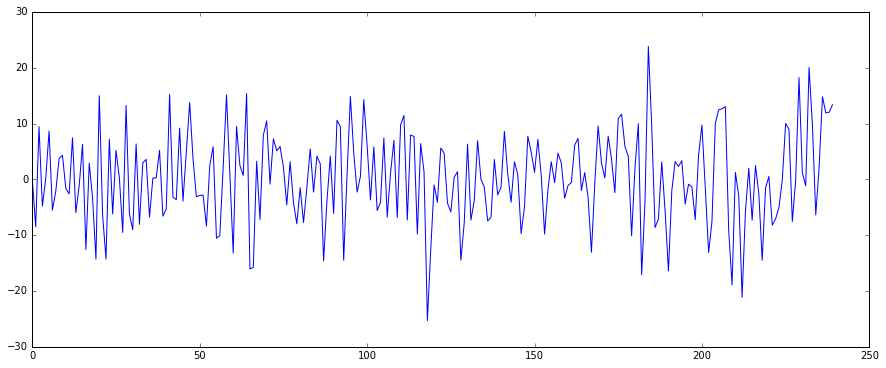

In [38]:
rcParams['figure.figsize'] = 15, 6
plt.plot(residu)

## plotting des autocorrelations des residus ARIMA

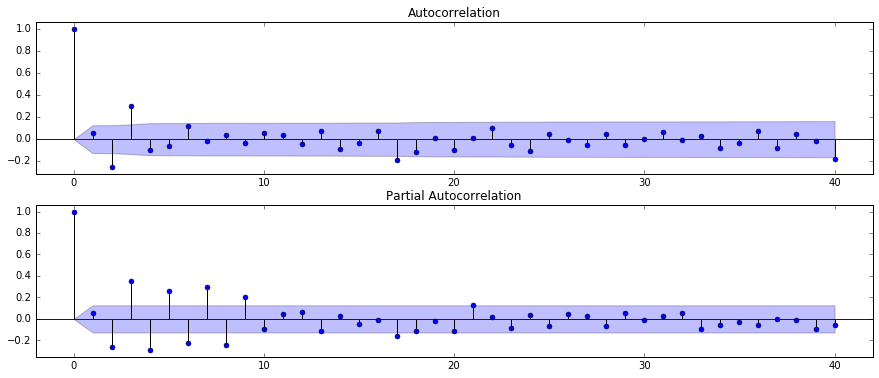

In [39]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residu, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residu, lags=40, ax=ax2)

## Comparaison des paramètres p, d, q 

In [40]:
ro.r('AIC(fit)')

array([ 1681.47292419])

In [41]:
ro.r('fit1 <- arima(r_timeseries, order = c(1,4,1))')

R object with classes: ('Arima',) mapped to:
<ListVector - Python:0x7fc01eef3998 / R:0x4c89ce8>
[Float..., Float..., Matrix, ..., IntVe..., IntVe..., ListV...]
  coef: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fc01ee7e098 / R:0x5d23be8>
[-0.474421, -0.999967]
  sigma2: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fc01ecdde60 / R:0x57bb8e8>
[447.923102]
  var.coef: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fc01ecf2fc8 / R:0x6ae8e58>
[0.003324, -0.000001, -0.000001, 0.000110]
  ...
  coef: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x7fc01ecf2ef0 / R:0x628b108>
[       0]
  sigma2: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x7fc01ecf2908 / R:0

In [42]:
ro.r('AIC(fit1)')

array([ 2129.42906115])

## qqplot

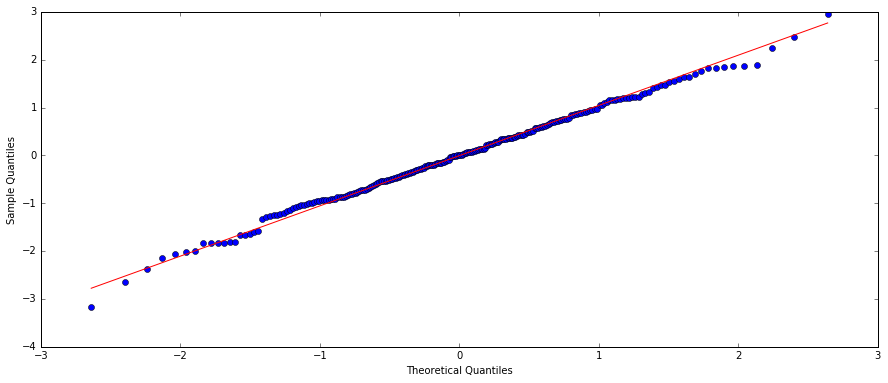

In [43]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
fig = sm.qqplot(residu, line='q', ax=ax, fit=True)

In [47]:
bparray.shape[0]

91